# 1. IMPORT REQUIRED LIBRARIES

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# 2. BASIC SETTINGS

In [11]:
batch_size=200
learning_rate=0.02
epochs=50

#3. PREPARE CIFAR-10 DATASET

In [12]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 4. DEFINE THE MODEL

In [13]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. CUDA, OPTIMIZER, LOSS FUNCTION

In [14]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. START TRAINING

In [15]:
history = model.fit(
    train_images,  # Training images
    train_labels,  # Corresponding labels for the training images
    epochs=epochs,  # Number of epochs to train for
    batch_size=batch_size  # Number of samples per gradient update
)

Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 1.9849 - accuracy: 0.2877
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 1.8150 - accuracy: 0.3540
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 1.7335 - accuracy: 0.3864
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 1.6786 - accuracy: 0.4040
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 1.6361 - accuracy: 0.4189
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 1.5999 - accuracy: 0.4343
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 1.5726 - accuracy: 0.4460
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 1.5411 - accuracy: 0.4578
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 1.5196 - accuracy: 0.4633
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 1.4934 - accuracy: 0.4716

# 7. EVALUATE THE MODEL

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3289 - accuracy: 0.5401 - 708ms/epoch - 2ms/step

Test accuracy: 0.5400999784469604


# 8. MAKE PREDICTIONS

In [17]:
def plot_image(img, prediction, label):
    for i in range(6):
        plt.imshow(img[i], interpolation='nearest')
        plt.title(f"Prediction: {prediction[i]} Label: {label[i][0]}")
        plt.show()

1/1 [==============================] - 0s 59ms/step


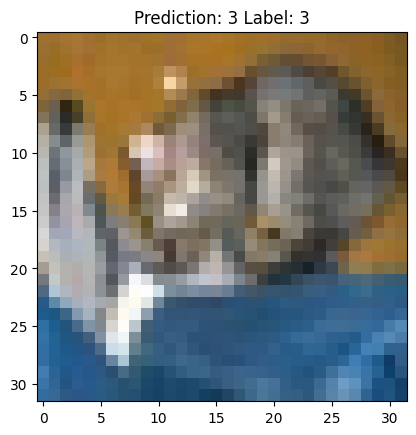

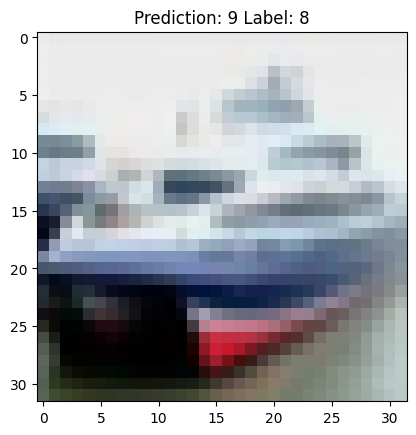

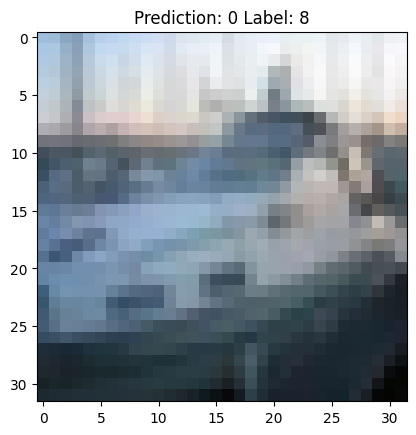

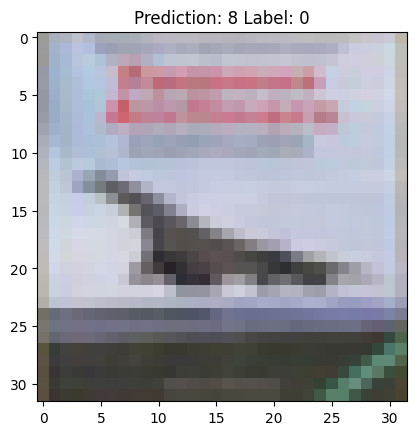

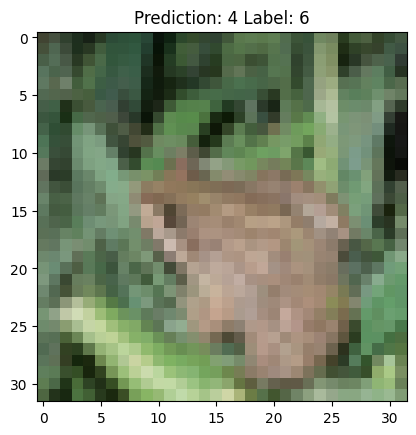

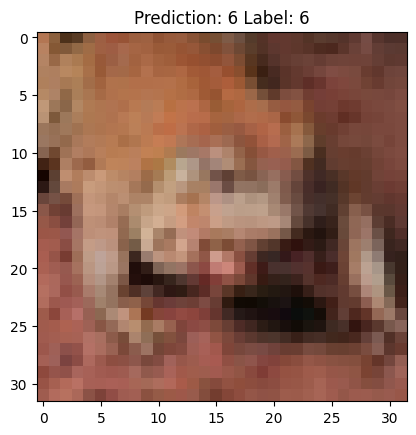

In [18]:
predictions = model.predict(test_images[:6])
predicted_labels = tf.argmax(predictions, axis=1)
plot_image(test_images[:6], predicted_labels.numpy(), test_labels[:6])